## 🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up your intuition.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


<h5/> Nomor 1

In [67]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets  import make_regression

In [2]:
X,y=make_regression(n_samples=200,
                    n_features=10,
                    n_targets=1)

Make 200 samples, 10 features, and 1 target from sklearn dataset

In [3]:
X,y

(array([[-2.16974466, -0.33112056, -0.53989368, ..., -1.72510394,
          0.93090805, -1.36240652],
        [ 0.29531062,  0.63904974,  0.35956935, ..., -0.84064586,
          0.84099058, -0.60369282],
        [-0.16569857, -2.39014197, -0.73096235, ..., -1.07535616,
          0.55140411, -0.01690006],
        ...,
        [ 2.29519786, -0.16887263,  1.23867566, ..., -1.04962552,
         -0.81326984,  0.47246323],
        [ 0.55744701, -0.60004975, -1.21065276, ...,  0.48969273,
          0.58789838,  1.51336606],
        [-0.34923282, -0.80095912, -1.23185312, ...,  0.07097285,
          0.8119837 , -0.43704455]]),
 array([-3.00148163e+02, -5.06126663e+00, -1.63909865e+02,  1.47415522e-01,
         1.55144015e+02,  8.41669508e+01, -4.11338323e+01,  2.16629988e+02,
        -1.60740881e+01,  1.96238752e+01,  5.02972505e+01,  1.28178986e+02,
        -1.76004295e+02, -1.82088533e+02,  9.96518503e+01, -3.56093635e+02,
         3.11509678e+01,  5.53519209e+00, -4.30834001e+01,  1.2788260

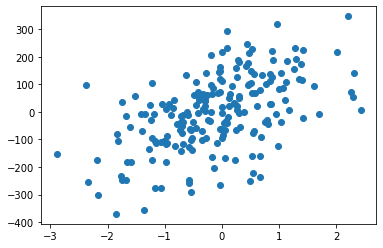

In [4]:
plt.scatter(X[:,0],y)
plt.show()

Doing some train split train test
for train model use 
`X_train and y_train`

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [7]:
tf.random.set_seed(42)

# Build model( 1 layers)
model_=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model_.compile(loss="mae",
               optimizer="Adam",
               metrics=["mae"])

# Fit model 200 epoch
model_.fit(X_train,y_train,epochs=200)


Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 109.8754 - mae: 109.8754
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 109.8638 - mae: 109.8638
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 109.8533 - mae: 109.8533
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 109.8428 - mae: 109.8428
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 109.8316 - mae: 109.8316
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 109.8208 - mae: 109.8208
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 109.8102 - mae: 109.8102
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 109.7995 - mae: 109.7995
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 109.7889 - mae: 109.7889
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 109.7778 - mae: 109.7778
Epoch 11/200
5/5 [=====================

In [8]:
model_.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 91.6870 - mae: 91.6870


[91.68699645996094, 91.68699645996094]

In [9]:
preds=model_.predict(X_test)
preds[0:5]

2/2 [==============================] - 0s 9ms/step


array([[-2.4933853],
       [-1.8641076],
       [-1.8820705],
       [-1.1088967],
       [ 3.434814 ]], dtype=float32)

In [10]:
def plot_preditiction(train_data,
                      train_label,
                      test_data,
                      test_label,
                      prediction_data):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",label="Training data")
  plt.scatter(test_data,test_label,c="g",label="Testing data")
  plt.scatter(test_data,prediction_data,c="r",label="Prediction data")
  plt.legend()

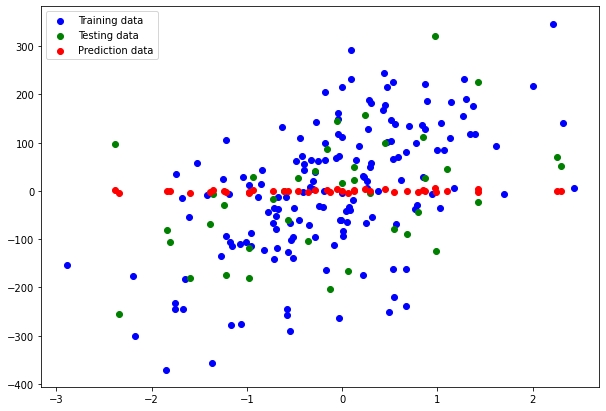

In [11]:
plot_preditiction(X_train[:,0],y_train,
                  X_test[:,0],y_test,preds)

In [12]:
tf.random.set_seed(42)

# Build model( 1 layers)
model_new=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile model
model_new.compile(loss="mae",
               optimizer="Adam",
               metrics=["mae"])

# Fit model 200 epoch
model_new.fit(X_train,y_train,epochs=200)


Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 109.8037 - mae: 109.8037
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 109.7214 - mae: 109.7214
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 109.6490 - mae: 109.6490
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 109.5764 - mae: 109.5764
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 109.5019 - mae: 109.5019
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 109.4236 - mae: 109.4236
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 109.3487 - mae: 109.3487
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 109.2666 - mae: 109.2666
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 109.1882 - mae: 109.1882
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 109.0978 - mae: 109.0978
Epoch 11/200
5/5 [=====================

In [13]:
preds_new=model_new(X_test)
preds_new[0:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-174.38153 ],
       [ -22.910746],
       [ -78.39587 ],
       [ -89.60879 ],
       [  98.46997 ]], dtype=float32)>

In [14]:
X_train.shape,y_train.shape

((160, 10), (160,))

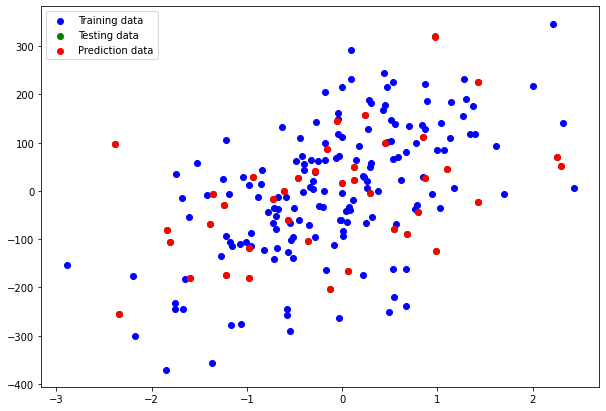

In [15]:
plot_preditiction(X_train[:,0],y_train,
                  X_test[:,0],y_test,preds_new)

In [16]:
data=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3/> Data wrangling

In [17]:
miss_data=data.isnull()
for column in miss_data.columns.values.tolist():
    print(column)
    print(miss_data[column].value_counts())
    print("")

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



there isn't any NaN data 

Check correlation

In [18]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


So the correlation data 
- `age` to `charges` have strong correlation beetwen any data 
so `age` can be good predictor to target `charges` 

seems like age and charges saling korelasi yang kuat, so age can be predictor to charges 

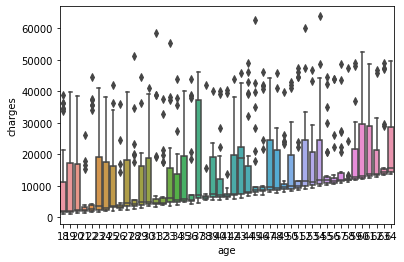

In [19]:
sns.boxplot(x="age", y="charges", data=data
            )

Binning
[what binning is ? ](https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38#:~:text=Binning%20or%20discretization%20is%20used,identify%20missing%20values%20or%20outliers.)

Binning features age

`Age` is  continous variable 
[refference](https://www.statology.org/is-age-discrete-or-continuous/#:~:text=Technically%20speaking%2C%20age%20is%20a,What%20is%20this%3F&text=If%20you%20know%20someone's%20birth,someone%20is%206.225549%20years%20old.)

Text(0.5, 1.0, 'Age bins')

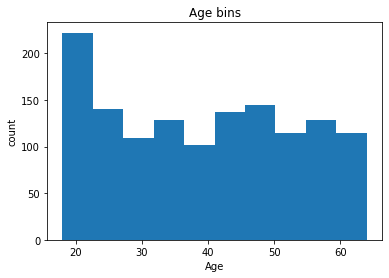

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["age"])

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age bins")

In [21]:
import numpy as np

In [22]:
bins=np.linspace(min(data["age"]),max(data["age"]),4)
bins

array([18.        , 33.33333333, 48.66666667, 64.        ])

As Can see 
- min age is 18 y/o
- max age is 63 y/o

In [23]:
umur_grup=["Dewasa","Paruh baya","Tua"]

In [24]:
data["Age-binned"]=pd.cut(data["age"],bins,labels=umur_grup,include_lowest=True)

In [25]:
data[["age","Age-binned"]]

,age,Age-binned
0,19,Dewasa
1,18,Dewasa
2,28,Dewasa
3,33,Dewasa
4,32,Dewasa
...,...,...
1333,50,Tua
1334,18,Dewasa
1335,18,Dewasa
1336,21,Dewasa


In [26]:
data[["Age-binned"]].value_counts()

Age-binned
Dewasa        523
Tua           413
Paruh baya    402
dtype: int64

Text(0.5, 1.0, 'Age bins')

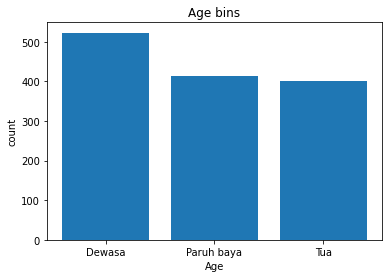

In [27]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(umur_grup, data["Age-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age bins")

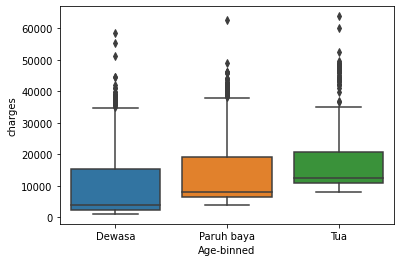

In [28]:
sns.boxplot(x="Age-binned", y="charges", data=data)

In [29]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Age-binned
0,19,female,27.900,0,yes,southwest,16884.92400,Dewasa
1,18,male,33.770,1,no,southeast,1725.55230,Dewasa
2,28,male,33.000,3,no,southeast,4449.46200,Dewasa
3,33,male,22.705,0,no,northwest,21984.47061,Dewasa
4,32,male,28.880,0,no,northwest,3866.85520,Dewasa


Encode

In [31]:
data_one_hot=pd.get_dummies(data[["sex","smoker","region"]])

In [32]:
data_one_hot.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


Concat or Combined data

In [33]:
df = pd.concat([data, data_one_hot], axis=1)

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Age-binned,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,Dewasa,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,Dewasa,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Dewasa,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Dewasa,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,Dewasa,0,1,1,0,0,1,0,0


In [35]:
df.drop(["sex","region","Age-binned","smoker"], axis = 1, inplace=True)


In [36]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Split to X and y

In [37]:
X=df.drop(["charges"],axis=1)
y=df["charges"]

In [39]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [40]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [106]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

data train mempunyai 11 fitur dan 1070 data <br>
data test hanya mempunyai 1 fitur karena hanya sebagai target prediksi dari data train

Model

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) 
hist=model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 12294.4268 - mae: 12294.4268
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 7847.2036 - mae: 7847.2036
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 7320.3218 - mae: 7320.3218
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7156.9941 - mae: 7156.9941
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7004.6270 - mae: 7004.6270
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6841.5601 - mae: 6841.5601
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 6602.6113 - mae: 6602.6113
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 6463.4946 - mae: 6463.4946
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 6388.8184 - mae: 6388.8184
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 6314.5195 - mae: 6314.51

In [56]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3084.0630 - mae: 3084.0630


[3084.06298828125, 3084.06298828125]

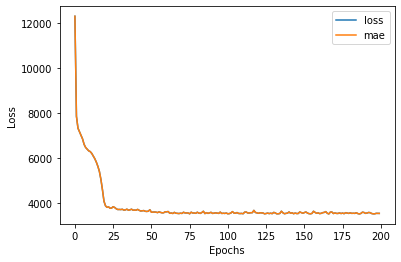

In [66]:
pd.DataFrame(hist.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

find out what the first parameter is, what happens if you increase it by 10x?
<br>
and run 400 epochs

In [107]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_400 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_400.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr= 0.001*10), # is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
              metrics=["mae"])

# Fit the model
# model.fit(X_train, y_train, epochs=400) 
hist_400=model_400.fit(X_train, y_train, epochs=400)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 4ms/step - loss: 8158.6309 - mae: 8158.6309
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 6500.4429 - mae: 6500.4429
Epoch 3/400
34/34 [==============================] - 0s 4ms/step - loss: 5773.7373 - mae: 5773.7373
Epoch 4/400
34/34 [==============================] - 0s 4ms/step - loss: 4410.9619 - mae: 4410.9619
Epoch 5/400
34/34 [==============================] - 0s 4ms/step - loss: 4003.4958 - mae: 4003.4958
Epoch 6/400
34/34 [==============================] - 0s 4ms/step - loss: 4221.1387 - mae: 4221.1387
Epoch 7/400
34/34 [==============================] - 0s 4ms/step - loss: 4164.5928 - mae: 4164.5928
Epoch 8/400
34/34 [==============================] - 0s 4ms/step - loss: 3920.8645 - mae: 3920.8645
Epoch 9/400
34/34 [==============================] - 0s 4ms/step - loss: 3949.5098 - mae: 3949.5098
Epoch 10/400
34/34 [==============================] - 0s 4ms/step - loss: 3952.8538 - mae: 3952.8538
Epoch 11/40

Text(0.5, 0, 'Epochs')

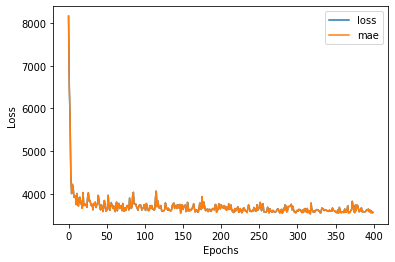

In [108]:
pd.DataFrame(hist_400.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

MAE 2 model
- 200 epoch
- 400 epoch

In [109]:
preds_=model.predict(X_test)
preds_[5] # Take 5 array index

9/9 [==============================] - 0s 2ms/step


array([5279.353], dtype=float32)

In [110]:
preds_400=model_400.predict(X_test)
preds_400[5] # Take 5 array index

9/9 [==============================] - 0s 2ms/step


array([5147.45], dtype=float32)

In [111]:
print(hist.history.keys()) # Check keys history

dict_keys(['loss', 'mae'])


In [112]:
model_results = [["model 200 epochs", hist.history['mae'][199],hist.history['loss'][199],preds_[5]],
                 ["model 400 epochs", hist_400.history['mae'][199],hist_400.history['loss'][399],preds_400[5]]]

In [113]:
all_results = pd.DataFrame(model_results, columns=["model","MAE","LOSS","Prediction"])
all_results

,model,MAE,LOSS,Prediction
0,model 200 epochs,3533.386475,3533.386475,[5279.353]
1,model 400 epochs,3646.258789,3563.455811,[5147.45]


4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


In [114]:
(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , test_split=0.2, seed=113)


57026/57026 [==============================] - 0s 0us/step


In [115]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [116]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_boston = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_boston.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr= 0.001*10), # is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
              metrics=["mae"])

# Fit the model
# model.fit(X_train, y_train, epochs=400) 
hist_boston=model_boston.fit(X_train, y_train, epochs=400)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


13/13 [==============================] - 1s 6ms/step - loss: 365.2981 - mae: 365.2981
Epoch 2/400
13/13 [==============================] - 0s 6ms/step - loss: 39.8042 - mae: 39.8042
Epoch 3/400
13/13 [==============================] - 0s 8ms/step - loss: 12.2321 - mae: 12.2321
Epoch 4/400
13/13 [==============================] - 0s 8ms/step - loss: 7.8997 - mae: 7.8997
Epoch 5/400
13/13 [==============================] - 0s 7ms/step - loss: 6.4067 - mae: 6.4067
Epoch 6/400
13/13 [==============================] - 0s 7ms/step - loss: 6.1587 - mae: 6.1587
Epoch 7/400
13/13 [==============================] - 0s 6ms/step - loss: 5.9578 - mae: 5.9578
Epoch 8/400
13/13 [==============================] - 0s 8ms/step - loss: 5.9407 - mae: 5.9407
Epoch 9/400
13/13 [==============================] - 0s 5ms/step - loss: 6.4247 - mae: 6.4247
Epoch 10/400
13/13 [==============================] - 0s 5ms/step - loss: 6.0269 - mae: 6.0269
Epoch 11/400
13/13 [==============================] - 0s 8ms/st

<h5/> Evaluate

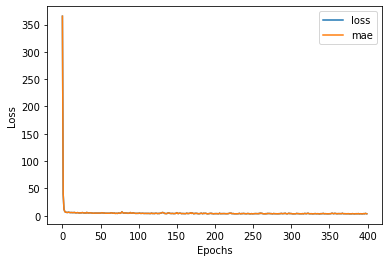

In [119]:
pd.DataFrame(hist_boston.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [129]:
X_test

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [126]:
preds_= model_boston.predict(X_test)
preds_ 

4/4 [==============================] - 0s 5ms/step


array([[10.262617 ],
       [19.614786 ],
       [22.779516 ],
       [28.199703 ],
       [24.569756 ],
       [21.72291  ],
       [31.141932 ],
       [25.264082 ],
       [19.878403 ],
       [21.212822 ],
       [18.83853  ],
       [19.394089 ],
       [18.028048 ],
       [35.54334  ],
       [16.17245  ],
       [21.8666   ],
       [24.92951  ],
       [21.52437  ],
       [18.611912 ],
       [23.564003 ],
       [10.748049 ],
       [13.507229 ],
       [21.84846  ],
       [15.443242 ],
       [24.877491 ],
       [21.17529  ],
       [30.546253 ],
       [30.271185 ],
       [13.040851 ],
       [21.610323 ],
       [22.45156  ],
       [16.753975 ],
       [35.01409  ],
       [23.74538  ],
       [17.359596 ],
       [ 7.465305 ],
       [17.24971  ],
       [19.639978 ],
       [15.979696 ],
       [30.913713 ],
       [26.145311 ],
       [27.069174 ],
       [18.404243 ],
       [34.941757 ],
       [28.669655 ],
       [24.101233 ],
       [30.647024 ],
       [18.99

In [121]:
model_boston.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.2686 - mae: 3.2686


[3.2685744762420654, 3.2685744762420654]

In [124]:
model_results = [["model_boston", hist_boston.history['mae'][399],hist_boston.history['loss'][399],preds_[5]]]

In [125]:
all_results = pd.DataFrame(model_results, columns=["model","MAE","LOSS","Prediction"])
all_results

,model,MAE,LOSS,Prediction
0,model_boston,3.522992,3.522992,[21.72291]
